In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
batch_size = 32
target_size = (500,500)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory('../data/recordings/cleaned_set/spectrogram/train_set',
                                                    color_mode='rgb',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory('../data/recordings/cleaned_set/spectrogram/test_set',
                                                       color_mode='rgb',
                                                       target_size=target_size,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

Found 260 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [15]:
model=Sequential()

model.add(Conv2D(16, (5,5), strides=4, padding='same', input_shape=(target_size[0], target_size[1], 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 125, 125, 16)      1216      
_________________________________________________________________
batch_normalization_3 (Batch (None, 125, 125, 16)      64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 62, 62, 32)        12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)       

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('spectrogram_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data = validation_generator, 
    verbose=1,
    epochs = 50,
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
9/9 [==============================] - 13s 1s/step - loss: 2.4169 - accuracy: 0.4725 - val_loss: 0.7208 - val_accuracy: 0.4886
Epoch 2/50
9/9 [==============================] - 12s 1s/step - loss: 0.7368 - accuracy: 0.4942 - val_loss: 0.6925 - val_accuracy: 0.4886
Epoch 3/50
9/9 [==============================] - 12s 1s/step - loss: 0.6750 - accuracy: 0.5489 - val_loss: 0.6932 - val_accuracy: 0.4886
Epoch 4/50
9/9 [==============================] - 12s 1s/step - loss: 0.6248 - accuracy: 0.7268 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 12s 1s/step - loss: 0.5424 - accuracy: 0.7742 - val_loss: 0.6810 - val_accuracy: 0.5795
Epoch 6/50
9/9 [==============================] - 12s 1s/step - loss: 0.5033 - accuracy: 0.7450 - val_loss: 0.6855 - val_accuracy: 0.5909
Epoch 7/50
9/9 [==============================] - 12s 1s/step - loss: 0.4381 - accuracy: 0.8026 - val_loss: 0.6822 - val_accuracy: 0.6364
Epoch 8/50
9/9 [==================

In [19]:
filepath = "../data/recordings/cleaned_set/cleaned_train_set/spanish/spanish1.wav"

In [27]:
import librosa
import IPython.display
import librosa.display

In [65]:
audio, sr = librosa.load(filepath)

In [87]:
audio_tf = tf.io.read_file(filepath)
audio_tf = tf.audio.decode_wav(audio_tf, 1, desired_samples= 16000*20)

In [88]:
audio_tf

DecodeWav(audio=<tf.Tensor: shape=(320000, 1), dtype=float32, numpy=
array([[0.00137329],
       [0.00210571],
       [0.0017395 ],
       ...,
       [0.01486206],
       [0.01464844],
       [0.01159668]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=16000>)

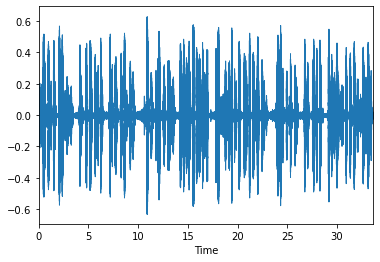

In [28]:
librosa.display.waveplot(audio, sr=sr)

In [71]:
mfcc_librosa = librosa.feature.mfcc(audio, sr, n_fft=512,
                                    n_mfcc=20, n_mels=40,
                                    hop_length=160)

In [89]:
mfcc_librosa.shape

(20, 4637)

In [94]:
mfccs = mfcc_librosa.copy()
mfccs.resize((20, 4000), refcheck=False)
mfccs.shape

(20, 4000)

In [80]:
import sklearn.preprocessing

In [95]:
mfccs = sklearn.preprocessing.scale(mfccs)

/Users/AustinCaldwell/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/AustinCaldwell/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [97]:
mfccs.shape

(20, 4000)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))

In [75]:
librosa.feature.delta(mfcc_librosa).shape

(20, 4637)

In [62]:
audio = audio.reshape(-1,1)

In [63]:
mfcc(audio, numcep=40)

array([[ -6.36652617,   1.58400755, -13.08271662, ...,   0.21847831,
         -0.67432119,   0.51622862],
       [ -5.33029351,   0.7710063 ,  -8.42748149, ...,   0.06798047,
         -1.04851019,  -0.46158262],
       [ -4.94640184,   2.20628886,  -6.20168443, ...,   0.16029781,
         -0.73196631,  -0.84404854],
       ...,
       [ -8.49153412,  -0.89384166, -15.29480091, ...,   0.04057602,
         -1.16855141,   0.63110049],
       [ -8.55173367,  -1.77328721, -12.48071577, ...,  -0.02029097,
         -0.8221585 ,  -0.46384749],
       [ -8.48522184,  -5.57551442,  -4.64622673, ...,  -0.10428296,
         -0.35322452,  -1.9328262 ]])

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

In [101]:
model=Sequential()

model.add(Conv1D(16, 5, strides=4, padding='same', input_shape=(20, 4000), activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(64, 3, padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 5, 16)             320016    
_________________________________________________________________
batch_normalization_5 (Batch (None, 5, 16)             64        
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 5, 32)             2592      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2, 64)             6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1, 64)           